#Objective - To build a model to predict who among the customers are more likely to invest in a deposit scheme to help channelize the efforts of the marketing team.
#Approach - Considering predicting the customers who are actually likely to invest in a term deposit as not going to invest in a term deposit will cost the bank more, the models I built are to focus more on improving on the true positive score (Recall score). This will ensure that the bank will not loose out on an opportunity to convert a potential customer who is morelikely to invest in the term deposit.
#Models built - 
1. Ensemble techniques 
- Random forest, 
- Gradient boosting, 
- Adaboosting, 
- bagging
2. Simple classification models
- KNN Neighbors
- Naive Bayes classifier
- Logistic regression based classifier
- Support vector machine based classifier
3. Voting based ensemble model
- Choose 3 models (Naive Bayes Classifier, Gradient boosting based classifier and Random forest
#Observations - The highest recall score remains at c.62% across models. 
#Steps taken to improvise the model - Plotted the correlation matrix to find the correlation between y (dependent variable) and the independent variables. Taking a threshold of 10% dropped all columns that have a correlation of less than 10% with the outcome variable as a step to reduce the dimensions to improve the performance of the models.
#Observations on improved model - A very nominal improvement in performance noted.
#Conclusion - The model's performance is not reliable for the purpose it is designed for. This is mainly attributable to lack of relant training input data sets such as salary/ earnings of the customer, average account balance maintained by the customer, etc which would add more color on the surplus funds with the customer and the customers capability to save and invest in deposits. More focus to be placed on collecting relevant data to build an efficient model

In [88]:
# importing pandas and numpy to import the data set and work on data frames and arrays
import pandas as pd
import numpy as np

# importing matplotlib plotting libraries
import matplotlib.pyplot as plt

# to enable plotting graphs in jupyter notebooks
%matplotlib inline

# importing seaborn for statistical plots
import seaborn as sns

# importing sklearn package's data splitting function to split the data into training and testing set
from sklearn.model_selection import train_test_split

# importing metrics to calculate the accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer  

#importing various classification models to build models to be used for ensemble technique

# importing logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# importing support vector machine from sklearn
from sklearn.svm import SVC

# importing KNN Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

# importing decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# importing gradient boosting classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

# importing ada boosting classifier from sklearn
from sklearn.ensemble import AdaBoostClassifier

# importing bagging classifier from sklearn
from sklearn.ensemble import BaggingClassifier

# importing baysian classifier from sklearn
from sklearn.naive_bayes import GaussianNB

# importing voting classifier from sklearn
from sklearn.ensemble import VotingClassifier

In [89]:
# importing the dataset as a dataframe using pandas
Data = pd.read_csv('bank-additional-full.csv', delimiter = ';')
pd.set_option('display.max_columns', 50)
Data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Preparing the data for analysis by checking the consistency of the data, performing exploratory data analytics and removing columns that are considered irrelavant for the learning models

In [90]:
#Checking for empty cells in the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [91]:
# there are no empty cells in the data

In [92]:
# Adding a column to bucket age groups in the multiples of 10s to analyse if there is a concentration in number of customers 
# investing in deposits in a specific age group
Data['age_group'] = (Data['age']//10)*10
Data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50


In [93]:
# plotting the 5 number summary for the data
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [94]:
# Replacing the target variable with number encoding
Data.y.replace(['yes','no'], [1,0], inplace = True)

C:\Users\Jarvis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Jarvis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Jarvis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Jarvis\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


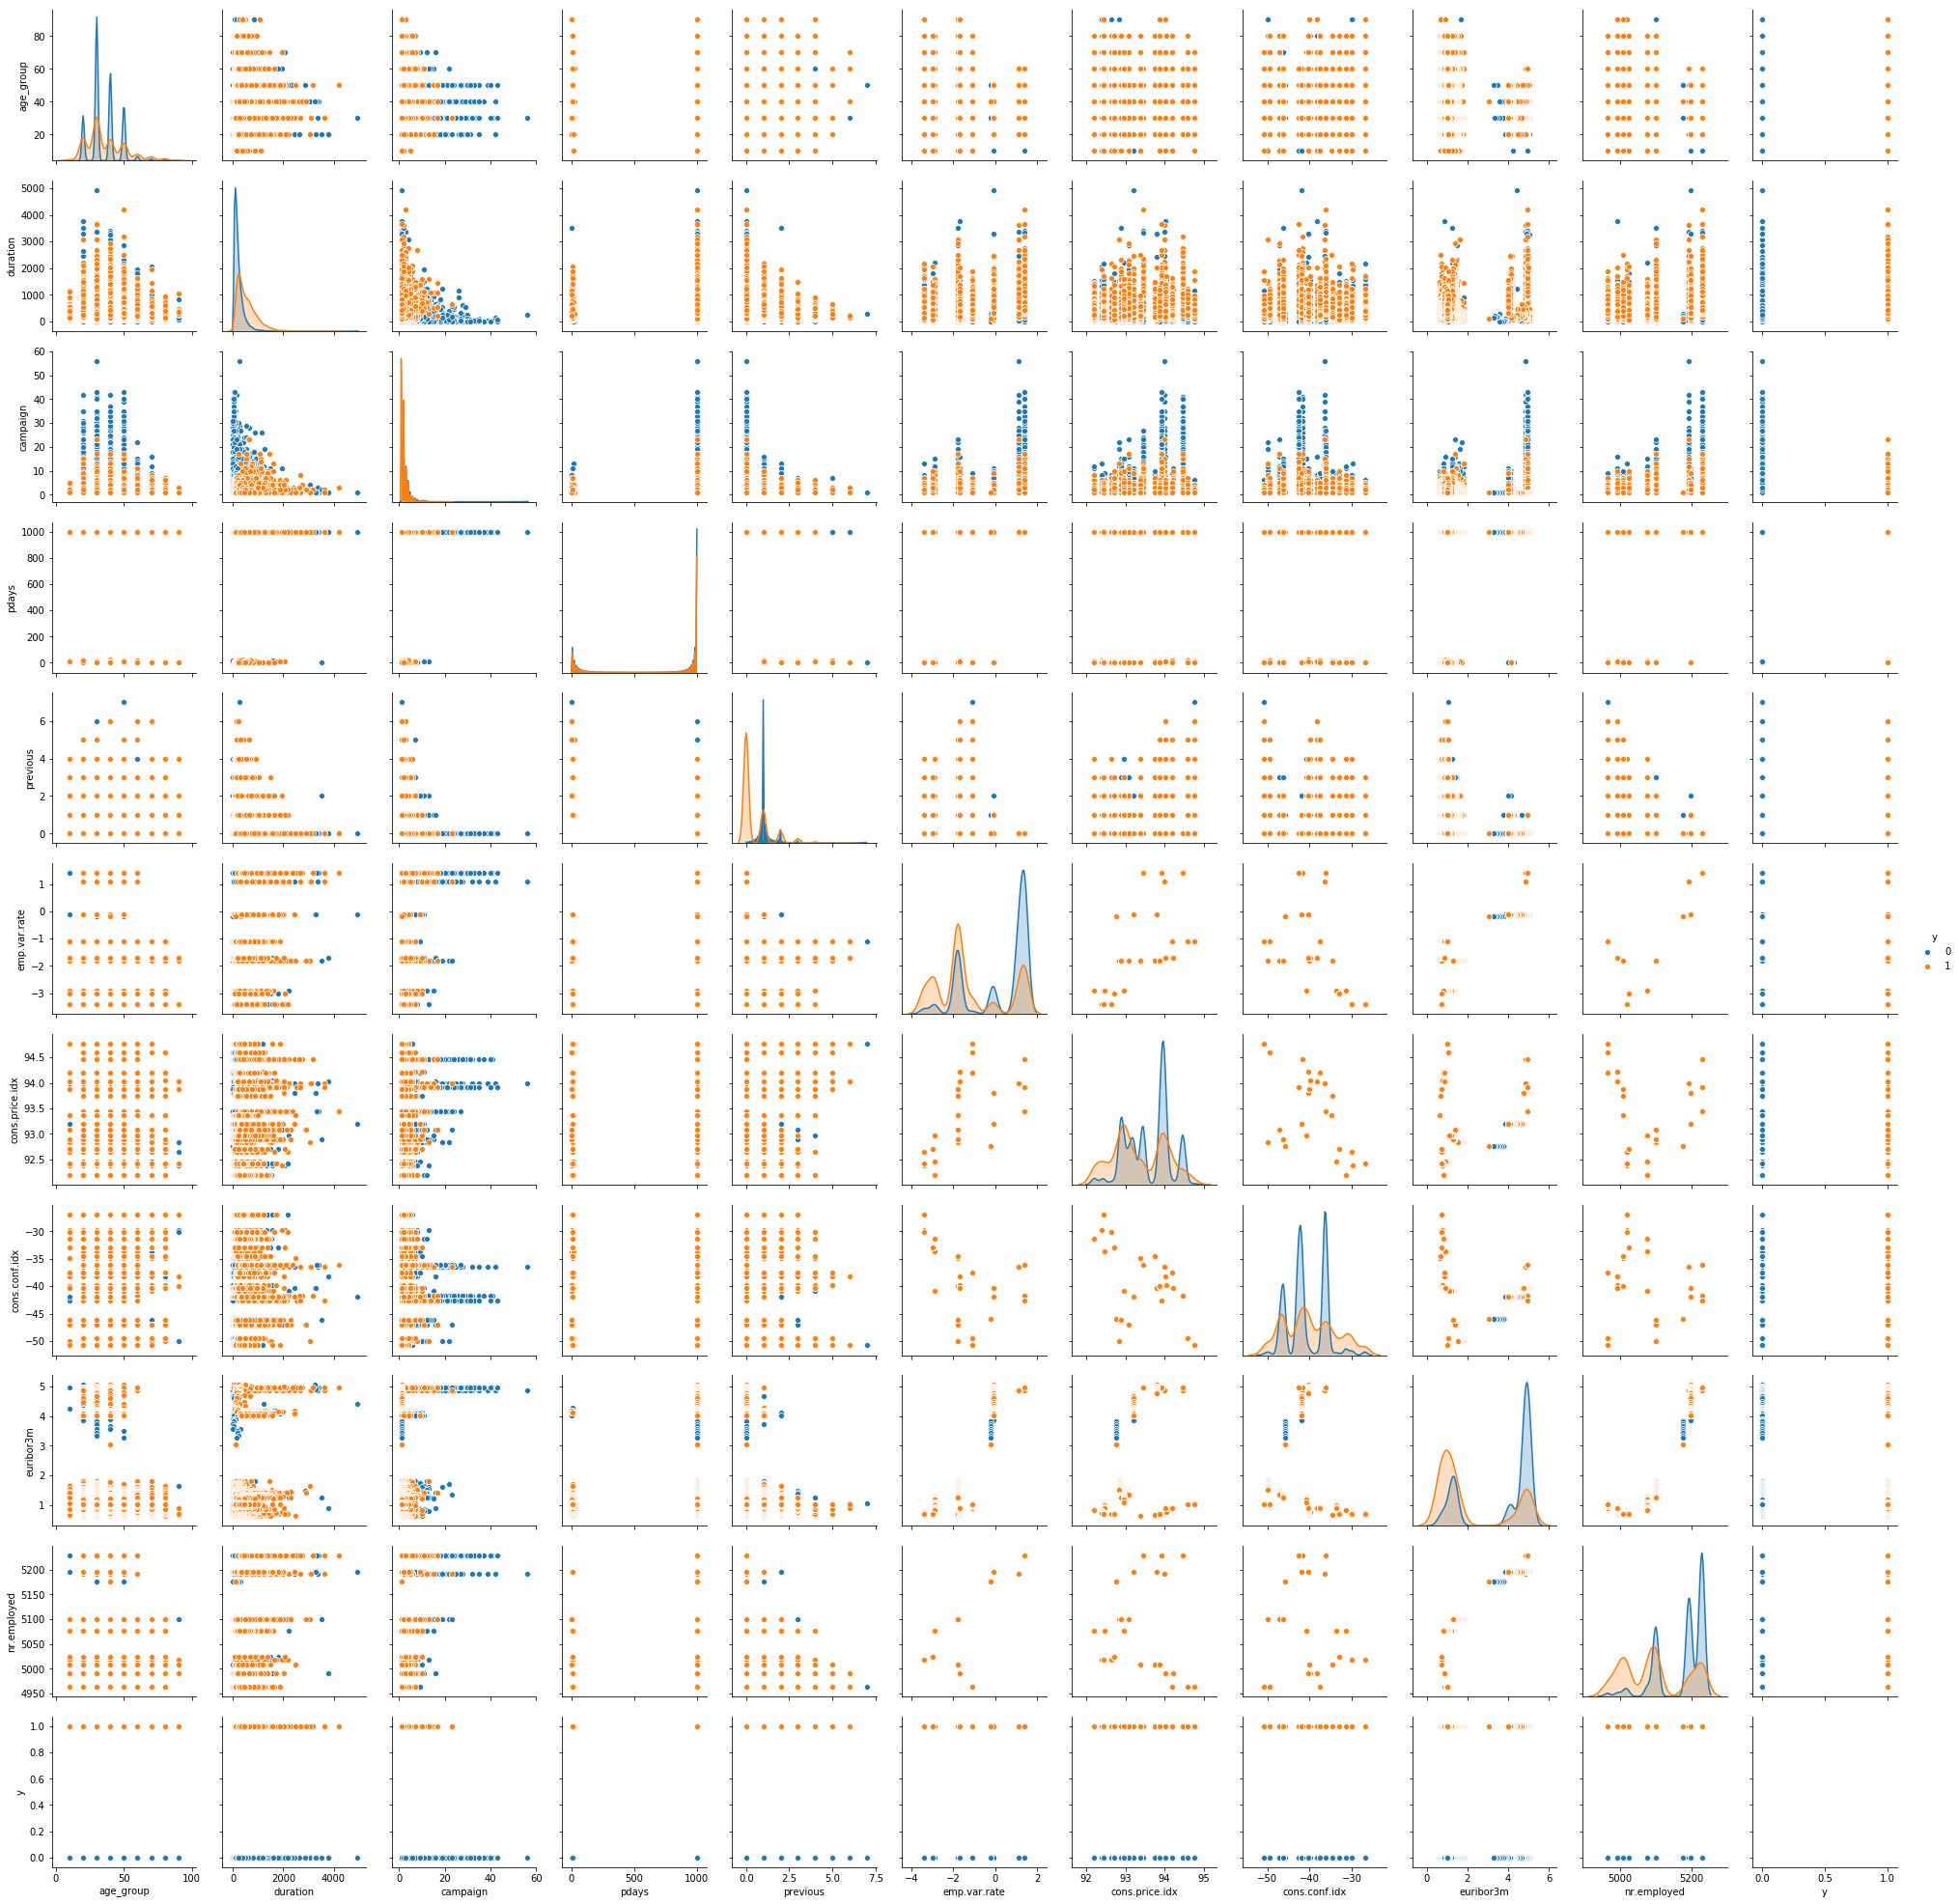

In [95]:
# pairplot on specific columns from the Loan data set
Data_pairplot = Data[['age_group', 'duration', 'campaign', 'pdays' , 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
sns.pairplot(Data_pairplot, hue='y')

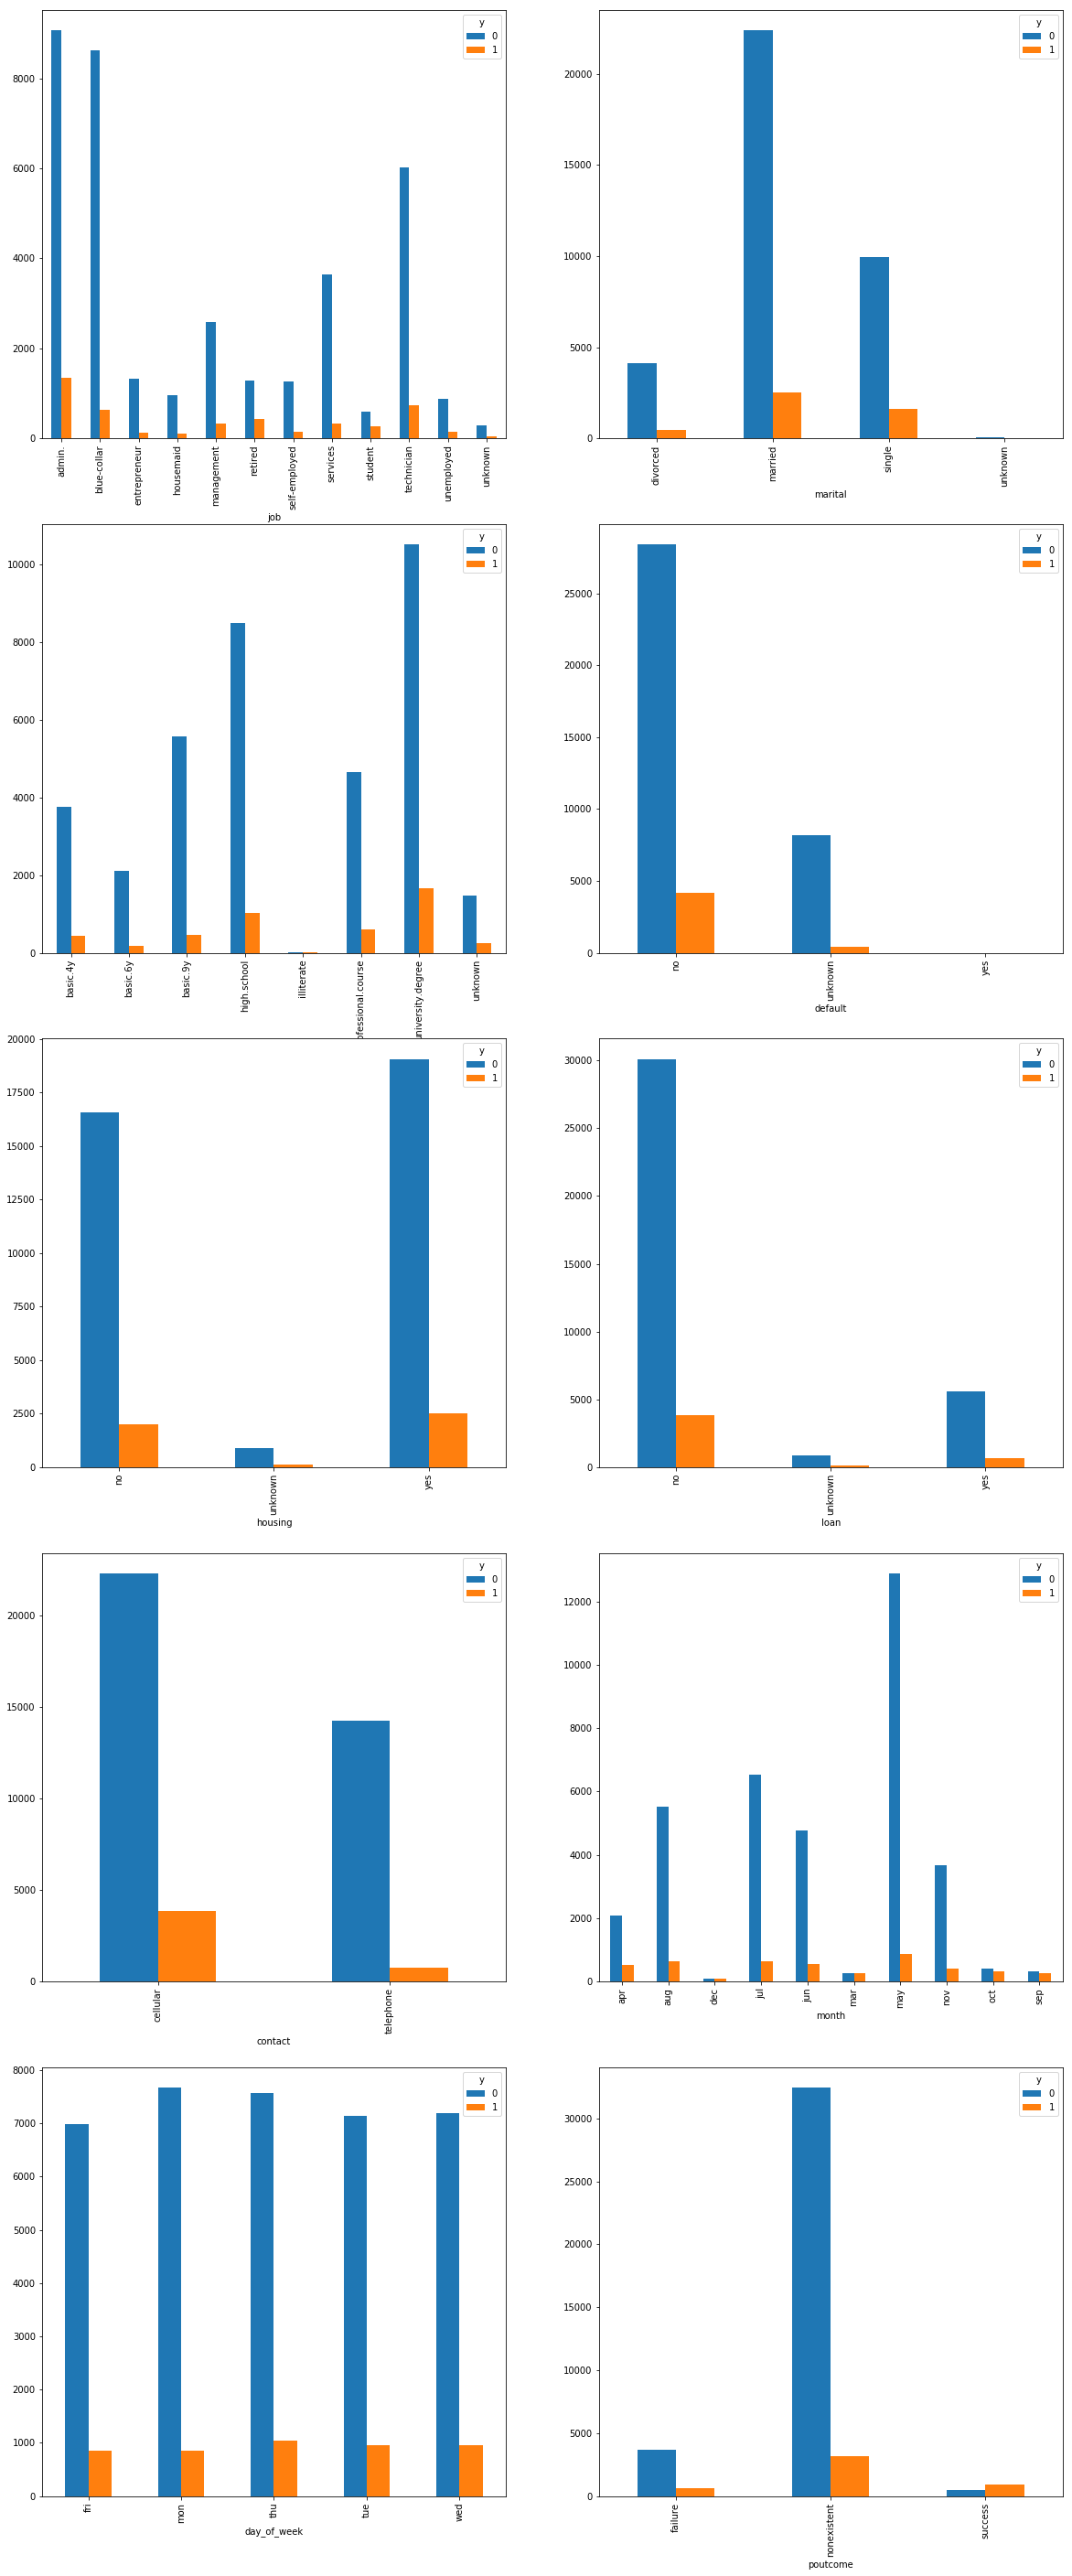

In [96]:
# plot for categorical data
Job = Data.pivot_table(index= ['job'], columns = 'y', aggfunc = 'count', values = 'age')
Marital_status = Data.pivot_table(index= ['marital'], columns = 'y', aggfunc = 'count', values = 'age')
Education = Data.pivot_table(index= ['education'], columns = 'y', aggfunc = 'count', values = 'age')
Default_history = Data.pivot_table(index= ['default'], columns = 'y', aggfunc = 'count', values = 'age')
Housing_loan = Data.pivot_table(index= ['housing'], columns = 'y', aggfunc = 'count', values = 'age')
Personal_loan = Data.pivot_table(index= ['loan'], columns = 'y', aggfunc = 'count', values = 'age')
Contact_type = Data.pivot_table(index= ['contact'], columns = 'y', aggfunc = 'count', values = 'age')
Last_contact_month = Data.pivot_table(index= ['month'], columns = 'y', aggfunc = 'count', values = 'age')
Day_contacted = Data.pivot_table(index= ['day_of_week'], columns = 'y', aggfunc = 'count', values = 'age')
Historical_success_rate = Data.pivot_table(index= ['poutcome'], columns = 'y', aggfunc = 'count', values = 'age')

fig, ax = plt.subplots(5,2, figsize = (20,50))
Job.plot(kind = 'bar',  ax = ax[0,0])
Marital_status.plot(kind = 'bar',  ax = ax[0,1])
Education.plot(kind = 'bar', ax = ax[1,0])
Default_history.plot(kind = 'bar', ax = ax[1,1])
Housing_loan.plot(kind = 'bar', ax = ax[2,0])
Personal_loan.plot(kind = 'bar', ax = ax[2,1])
Contact_type.plot(kind = 'bar', ax = ax[3,0])
Last_contact_month.plot(kind = 'bar', ax = ax[3,1])
Day_contacted.plot(kind = 'bar', ax = ax[4,0])
Historical_success_rate.plot(kind = 'bar', ax = ax[4,1])


Based on the pair plot and the count plot presented above the following observations are made:
1. The data points are highly overlapping for customers who have opted for a term deposit and those who have not.
2. We notice a distinction based on the column previous (number of contacts performed before this campaign and for this client) where customers who have been contacted lesser number of times are more likely to invest in a term deposit. It could be inferred that if a customer is interested they convert easy without much follow up. But customers who dont want to invest are hard to convince and increased number of follow ups in the past has not helped in convincing such customers to invest.
3. Column last contacted day of the week doesn't seem to impact the outcome. Hence the same is considered an irrelavant information to the model.

In [97]:
# Dropping column day_of_week as its irrelavant to the model
Data.drop(columns = 'day_of_week', inplace = True)

Approach followed: Build models based on ensemble techniques such as random forest, ensemble models using gradient boosting, ada boosting and bagging techniques. Also building basic classification models such as KNN Neighbors, Naive Bayes classifier, Logistic regression and support vector machine. Based on the recall score of each model selecting 3 models to build a voting classifier based ensemble model.

In [98]:
# Method used to deal with categorical data
# creating two data sets - one with higher number dimensions (using one hot encoder to convert some categorical to numeric data)
# and the other with lower number of dimensions (using label encoding to convert categorical data to numeric data)

In [99]:
#Creating a training dataset with lower number of dimensions to build models such as KNN Neighbors, decision tree, random forest
# naive bayes, etc using label encoder to convert categorical data into numeric data
Data_LD = Data.copy()
Data_LD.default.replace(['no','unknown','yes'], [1,0,-1], inplace= True)
Data_LD.housing.replace(['yes','no','unknown'], [2,1,0], inplace = True)
Data_LD.loan.replace(['yes','no','unknown'], [2,1,0], inplace = True)
Data_LD.month.replace(['dec','mar','oct','sep'], [0,0,0,0], inplace = True)
Data_LD.month.replace(['apr'], [1], inplace = True)
Data_LD.month.replace(['nov','jun'], [2,2], inplace = True)
Data_LD.month.replace(['aug','jul'], [3,3], inplace = True)
Data_LD.month.replace(['may'], [4], inplace = True)

le = LabelEncoder()

for col in Data_LD.columns:
    if Data_LD[col].dtype == "object":
        Data_LD[col] = le.fit_transform(Data_LD[col])
        
Data_LD.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,3,1,0,1,1,1,1,4,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,50
1,57,7,1,3,0,1,1,1,4,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,50
2,37,7,1,3,1,2,1,1,4,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,30
3,40,0,1,1,1,1,1,1,4,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,40
4,56,7,1,3,1,1,2,1,4,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,50


In [100]:
# splitting the data into train test split
X_LD = Data_LD.loc[:, Data_LD.columns != 'y']
y_LD = Data_LD['y']
X_train_LD, X_test_LD, y_train_LD, y_test_LD = train_test_split(X_LD, y_LD, test_size = 0.3, random_state = 6)

In [101]:
# Building a model using random forest classifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=17)
rfcl = rfcl.fit(X_train_LD, y_train_LD)
rf_y_predict = rfcl.predict(X_test_LD)

In [102]:
# evaluate accuracy
print(metrics.confusion_matrix(y_test_LD, rf_y_predict))
print(accuracy_score(y_test_LD, rf_y_predict))
print(recall_score(y_test_LD, rf_y_predict))

[[10489   466]
 [  670   732]]
0.9080683013676458
0.5221112696148359


In [103]:
#The model has a reasonable good accuracy score but has a low recall score.

In [104]:
# Building a model using gradient boosting classifier
gbcl = GradientBoostingClassifier(n_estimators = 190,random_state=1)
gbcl = gbcl.fit(X_train_LD, y_train_LD)
gb_y_predict = gbcl.predict(X_test_LD)
# evaluating accuracy
print(metrics.confusion_matrix(y_test_LD, gb_y_predict))
print(accuracy_score(y_test_LD, gb_y_predict))
print(recall_score(y_test_LD, gb_y_predict))

[[10550   405]
 [  633   769]]
0.9159990288905074
0.5485021398002853


In [105]:
#The model has a reasonable good accuracy score but has a low recall score. The recall score is marginally better than 
# that of random forest classifier

In [106]:
# Building a model using ada boosting classifier
abcl = AdaBoostClassifier(n_estimators=70, random_state=1)
abcl = abcl.fit(X_train_LD, y_train_LD)
ab_y_predict = abcl.predict(X_test_LD)
# evaluating accuracy
print(metrics.confusion_matrix(y_test_LD, ab_y_predict))
print(accuracy_score(y_test_LD, ab_y_predict))
print(recall_score(y_test_LD, ab_y_predict))

[[10644   311]
 [  816   586]]
0.9087966334870924
0.41797432239657634


In [107]:
#The model has a reasonable good accuracy score but the recall score dropped as compared to random forest and 
#gradient boosting classifier

In [108]:
# Building a model using decision tree classifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_LD, y_train_LD)
DT_y_predict = dTree.predict(X_test_LD)
# evaluating accuracy
print(metrics.confusion_matrix(y_test_LD, DT_y_predict))
print(accuracy_score(y_test_LD, DT_y_predict))
print(recall_score(y_test_LD, DT_y_predict))

[[10228   727]
 [  678   724]]
0.8862992635753014
0.5164051355206848


In [109]:
# Adjusting the max_depth of the classifier at each node to attempt at improving the accuracy and recall scores
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=6)
dTreeR.fit(X_train_LD, y_train_LD)
DTr_y_predict = dTree.predict(X_test_LD)
# evaluating accuracy
print(metrics.confusion_matrix(y_test_LD, DTr_y_predict))
print(accuracy_score(y_test_LD, DTr_y_predict))
print(recall_score(y_test_LD, DTr_y_predict))

[[10228   727]
 [  678   724]]
0.8862992635753014
0.5164051355206848


In [110]:
# The model has a reasonable accuracy score and a low recall score. Adjusting the depth doesn't affect the model's performance

In [111]:
# Building a model using bagging classifier
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train_LD, y_train_LD)
bg_y_predict = dTree.predict(X_test_LD)
# evaluating accuracy
print(metrics.confusion_matrix(y_test_LD, bg_y_predict))
print(accuracy_score(y_test_LD, bg_y_predict))
print(recall_score(y_test_LD, bg_y_predict))


[[10228   727]
 [  678   724]]
0.8862992635753014
0.5164051355206848


In [112]:
# The model's performance is the same as that of the decision tree built earlier

In [113]:
# Building a model using Naive Bayes classifier
model_NB = GaussianNB()
model_NB.fit(X_train_LD, y_train_LD)
print(model_NB)
# make predictions
NB_predict = model_NB.predict(X_test_LD)
# evaluating accuracy
print(metrics.confusion_matrix(y_test_LD, NB_predict))
print(accuracy_score(y_test_LD, NB_predict))
print(recall_score(y_test_LD, NB_predict))

GaussianNB(priors=None, var_smoothing=1e-09)
[[9566 1389]
 [ 544  858]]
0.8435704459011086
0.6119828815977175


In [114]:
# Building a model using KNN Neighbors
# Run the KNN with K values from 1 to 19 (odd numbers only) and find the optimal K value
k_value = list(range(1,90,2))
score = []
for k in k_value:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_LD,y_train_LD)
    y_pred_LD = knn.predict(X_test_LD)
    recall_scores = recall_score(y_test_LD , y_pred_LD)
    score.append(recall_scores)

optimal_k = k_value[score.index(max(score))]
print(optimal_k)

5


In [115]:
#Cannot use 1 as the K value because the model will only be memorising the pattern and not learning it. This will lead to 
# over fitting and accoridng a k value of 3 is used 
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train_LD, y_train_LD)

# predict the response
y_pred_LD = knn.predict(X_test_LD)

# evaluate accuracy
print(metrics.confusion_matrix(y_test_LD, y_pred_LD))
print(accuracy_score(y_test_LD, y_pred_LD))
print(recall_score(y_test_LD, y_pred_LD))

[[10415   540]
 [  707   695]]
0.8990855385611395
0.4957203994293866


In [116]:
#The model has a reasonable good accuracy score but has a very poor recall score.

In [117]:
# Using data with higher number of dimensions to build models based on logistic regression and support vector machines
Data_HD = Data.copy()
Data_HD.drop(columns = ['age'], inplace = True)
# performing value count to understand the significance of the categorical data provided
print(Data_HD.default.value_counts())
print(Data_HD.housing.value_counts())
print(Data_HD.loan.value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


In [118]:
# Specifically encoding the below categorical data based on the trends noticed in the count plots presented above
Data_HD.default.replace(['no','unknown','yes'], [1,0,-1], inplace= True)
Data_HD.housing.replace(['yes','no','unknown'], [2,1,0], inplace = True)
Data_HD.loan.replace(['yes','no','unknown'], [2,1,0], inplace = True)
Data_HD.month.replace(['dec','mar','oct','sep'], [0,0,0,0], inplace = True)
Data_HD.month.replace(['apr'], [1], inplace = True)
Data_HD.month.replace(['nov','jun'], [2,2], inplace = True)
Data_HD.month.replace(['aug','jul'], [3,3], inplace = True)
Data_HD.month.replace(['may'], [4], inplace = True)

In [119]:
# one hot encoding the rest of the categorical variables
onehotcols = []
for col in Data_HD.columns:
    if Data_HD[col].dtype == "object":
        onehotcols.append(col)
Data_HD = pd.get_dummies(Data_HD, columns=onehotcols)
Data_HD.head(10)

,default,housing,loan,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1,1,1,4,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,1,1,4,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,1,2,1,4,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,30,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,1,1,1,4,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,1,1,2,4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
5,0,1,1,4,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
6,1,1,1,4,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
7,0,1,1,4,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
8,1,2,1,4,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
9,1,2,1,4,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [120]:
# splitting the data into train test split
X = Data_HD.loc[:, Data_HD.columns != 'y']
y = Data_HD['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

In [121]:
# creating a training and test dataset by converting all columns to its z-score values using preprocessing method from sklearn

from sklearn import preprocessing

# scale all the columns of the training and test customer data. This will produce a numpy array

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


In [122]:
# building a logistic regression classification model
model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)
LR_y_predict = model_LR.predict(X_test_scaled)

C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
# evaluate accuracy
print(metrics.confusion_matrix(y_test, LR_y_predict))
print(accuracy_score(y_test, LR_y_predict))
print(recall_score(y_test, LR_y_predict))

[[10645   310]
 [  833   569]]
0.9075018208302986
0.405848787446505


In [124]:
#The model has a reasonable good accuracy score but has a poor recall score.

In [125]:
# Building a Support Vector Machine on train data with rbf kernel
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [126]:
# evaluate accuracy
print(metrics.confusion_matrix(y_test, y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))
print(recall_score(y_test, y_pred_svc))

[[10738   217]
 [ 1118   284]]
0.891964068948774
0.20256776034236804


In [127]:
#The model has a reasonable good accuracy score but has a very poor recall score.

Building a voting classifier based ensemble model using the model created using naive bayes classifier, ensemble model based on gradient boosting and random forest. (based on the recall scores). Higher weights are given to naive bayes classifier as it has the highest recall score.

In [128]:
vtcl = VotingClassifier(estimators=[('gbdt', gbcl), ('rf', rfcl), ('gnb', model_NB)], weights=[2,1,4])

In [129]:
vtcl.fit(X_train_LD,y_train_LD)

VotingClassifier(estimators=[('gbdt', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1...andom_state=1, verbose=0, warm_start=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='hard',
         weights=[2, 1, 4])

In [130]:
vtcl_predict = vtcl.predict(X_test_LD)

In [131]:
# evaluate accuracy
print(metrics.confusion_matrix(y_test_LD, vtcl_predict))
print(accuracy_score(y_test_LD, vtcl_predict))
print(recall_score(y_test_LD, vtcl_predict))

[[9566 1389]
 [ 544  858]]
0.8435704459011086
0.6119828815977175


The performance of the voting based classifier is similar to that of the performance of the naive bayes classifier due to the higher weights given to naive bayes classifier

#Attempting to remove data pollution in the training data set by eliminating all input variables that has correlation of less than 10% to the out put variable (y)

In [132]:
#Computing correlation
print(Data_LD.corr())

                     age       job   marital  education   default   housing  \
age             1.000000  0.001250 -0.389753  -0.117892 -0.164965 -0.000987   
job             0.001250  1.000000  0.027897   0.134121  0.028277  0.006381   
marital        -0.389753  0.027897  1.000000   0.109220  0.079450  0.010545   
education      -0.117892  0.134121  0.109220   1.000000  0.186859  0.018952   
default        -0.164965  0.028277  0.079450   0.186859  1.000000  0.017586   
housing        -0.000987  0.006381  0.010545   0.018952  0.017586  1.000000   
loan           -0.006048 -0.009115  0.006749   0.010938  0.007961  0.228650   
contact         0.007021 -0.025132 -0.054501  -0.105726 -0.135238 -0.083498   
month          -0.082870 -0.045761 -0.017152  -0.096760 -0.117655 -0.020299   
duration       -0.000866 -0.006490  0.010290  -0.015102  0.011794 -0.004850   
campaign        0.004594 -0.006923 -0.007240   0.000371 -0.032825 -0.009768   
pdays          -0.034369 -0.028468 -0.037942  -0.046

In [133]:
# creating a copy of the data set and removing irrelavant columns
Data_lean = Data_LD.copy()

In [134]:
Data_lean.drop(columns = ['cons.conf.idx', 'loan', 'campaign', 'age', 'job', 'marital', 'education', 'housing', 'age_group'], inplace = True)

In [135]:
# splitting the data into train test split
X_lean = Data_lean.loc[:, Data_lean.columns != 'y']
y_lean = Data_lean['y']
X_train_lean, X_test_lean, y_train_lean, y_test_lean = train_test_split(X_lean, y_lean, test_size = 0.3, random_state = 6)

In [136]:
# Building models based on the trimmed training data

In [137]:
#Building a Naive Bayes classification model 
model_NB_lean = GaussianNB()
model_NB_lean.fit(X_train_lean, y_train_lean)
print(model_NB_lean)
# make predictions
NB_predict_lean = model_NB_lean.predict(X_test_lean)
# evaluate accuracy
print(metrics.confusion_matrix(y_test_lean, NB_predict_lean))
print(accuracy_score(y_test_lean, NB_predict_lean))
print(recall_score(y_test_lean, NB_predict_lean))


GaussianNB(priors=None, var_smoothing=1e-09)
[[9672 1283]
 [ 611  791]]
0.8467265517520434
0.5641940085592011


In [138]:
# The performance of the model has dropped on the trimmed training data set

In [139]:
# Building a logistic regression model based on the trimmed training data set
X_train_l_scaled = preprocessing.scale(X_train_lean)
X_test_l_scaled = preprocessing.scale(X_test_lean)
model_LR_lean = LogisticRegression()
model_LR_lean.fit(X_train_l_scaled, y_train_lean)
LR_y_predict_l = model_LR_lean.predict(X_test_l_scaled)

C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [140]:
# evaluate accuracy
print(metrics.confusion_matrix(y_test_lean, LR_y_predict_l))
print(accuracy_score(y_test_lean, LR_y_predict_l))
print(recall_score(y_test_lean, LR_y_predict_l))

[[10649   306]
 [  844   558]]
0.9069353402929513
0.3980028530670471


In [141]:
# The performance of the model has dropped on the trimmed training data set

In [142]:
# Building a gradient boosting classifier model based on the trimmed training data set
gbcl_lean = GradientBoostingClassifier(n_estimators = 1000,random_state=1)
gbcl_lean = gbcl_lean.fit(X_train_lean, y_train_lean)
gb_y_predict_l = gbcl_lean.predict(X_test_lean)
# evaluate accuracy
print(metrics.confusion_matrix(y_test_lean, gb_y_predict_l))
print(accuracy_score(y_test_lean, gb_y_predict_l))
print(recall_score(y_test_lean, gb_y_predict_l))

[[10551   404]
 [  628   774]]
0.9164845836368051
0.5520684736091298


In [143]:
# Building a random forest classifier model based on the trimmed training data set
rfcl_lean = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=10)
rfcl_lean = rfcl_lean.fit(X_train_lean, y_train_lean)
rf_y_predict_l = rfcl_lean.predict(X_test_lean)
# evaluate accuracy
print(metrics.confusion_matrix(y_test_lean, rf_y_predict_l))
print(accuracy_score(y_test_lean, rf_y_predict_l))
print(recall_score(y_test_lean, rf_y_predict_l))

[[10410   545]
 [  634   768]]
0.9045884923525127
0.5477888730385164


As can be seen from above the recall score has marginally improved for the random forest and gradient boosting based classifier built on the trimmed training data set

Conclusion - The model's performance is not reliable for the purpose it is designed for. This is mainly attributable to lack of relant training input data sets such as salary/ earnings of the customer, average account balance maintained by the customer, etc which would add more color on the surplus funds with the customer and the customers capability to save and invest in deposits. More focus to be placed on collecting relevant data to build an efficient model